In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import ray
from ray.rllib.agents.ppo import PPOTrainer, DEFAULT_CONFIG

%matplotlib inline

In [ ]:
# RAY CLUSTER

ray.init(ignore_reinit_error=True, log_to_driver=False)
# ray.shutdown()

## Training

In [4]:
# CONFIG

config = DEFAULT_CONFIG.copy()
config['num_workers'] = 3
config['num_sgd_iter'] = 30
config['sgd_minibatch_size'] = 128
config['model']['fcnet_hiddens'] = [100, 100]
# config['use_pytorch'] = True
# config['eager'] = True
# config['eager_tracing'] = True

In [5]:
# TRAINER / AGENT
agent = PPOTrainer(config , 'CartPole-v0')

2020-10-31 14:55:09,199	INFO trainer.py:421 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-10-31 14:55:09,250	INFO trainer.py:580 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2020-10-31 14:55:14,964	INFO trainable.py:217 -- Getting current IP.
2020-10-31 14:55:14,966	WARNING util.py:37 -- Install gputil for GPU system monitoring.


In [6]:
# TRAIN LOOP

NUM_EPISODES = 10
results = []
episode_data = []

for epoch in tqdm(range(NUM_EPISODES)):
    result = agent.train()
    results.append(result)
    
    print(f"MAX REWARD {result['episode_reward_max']} \t MEAN REWARD {round(result['episode_reward_mean'], 2)} \t MEAN_LEN {round(result['episode_len_mean'], 2)}")

MAX REWARD 54.0 	 MEAN REWARD 22.52 	 MEAN_LEN 22.52
MAX REWARD 138.0 	 MEAN REWARD 40.55 	 MEAN_LEN 40.55
MAX REWARD 200.0 	 MEAN REWARD 62.08 	 MEAN_LEN 62.08
MAX REWARD 200.0 	 MEAN REWARD 92.05 	 MEAN_LEN 92.05
MAX REWARD 200.0 	 MEAN REWARD 118.65 	 MEAN_LEN 118.65
MAX REWARD 200.0 	 MEAN REWARD 141.3 	 MEAN_LEN 141.3
MAX REWARD 200.0 	 MEAN REWARD 166.18 	 MEAN_LEN 166.18
MAX REWARD 200.0 	 MEAN REWARD 181.39 	 MEAN_LEN 181.39
MAX REWARD 200.0 	 MEAN REWARD 193.54 	 MEAN_LEN 193.54
MAX REWARD 200.0 	 MEAN REWARD 190.78 	 MEAN_LEN 190.78



In [7]:
CKPT_PATH = agent.save("./checkpoints/")
CKPT_PATH

'./checkpoints/checkpoint_10/checkpoint-10'

## Results

In [8]:
results[-1]

{'episode_reward_max': 200.0,
 'episode_reward_min': 14.0,
 'episode_reward_mean': 190.78,
 'episode_len_mean': 190.78,
 'episodes_this_iter': 22,
 'policy_reward_min': {},
 'policy_reward_max': {},
 'policy_reward_mean': {},
 'custom_metrics': {},
 'hist_stats': {'episode_reward': [198.0,
   197.0,
   179.0,
   149.0,
   200.0,
   114.0,
   200.0,
   200.0,
   185.0,
   164.0,
   14.0,
   188.0,
   198.0,
   165.0,
   200.0,
   200.0,
   192.0,
   200.0,
   200.0,
   200.0,
   158.0,
   198.0,
   57.0,
   200.0,
   166.0,
   200.0,
   200.0,
   200.0,
   175.0,
   200.0,
   149.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   190.0,
   200.0,
   200.0,
   199.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   200.0,
   194.0,
   162.0,
   200.0,
   200.0,
   200.0,
   200.0,
   182.0,
   200.0,
   200.0,
   187.0,
   200.0,
   200.0,
 

In [9]:
episode_rewards = []
for result in results:
    episode_rewards.extend(result['hist_stats']['episode_reward'])

mean_rewards = []
for i in range(len(episode_rewards)):
    mean_rewards.append(np.mean(episode_rewards[np.clip(i-100,0,None) : i+1]))

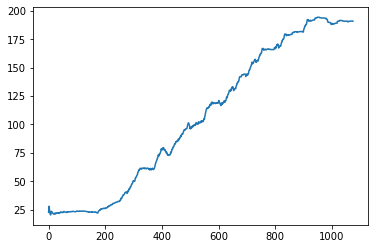

In [10]:
plt.plot(mean_rewards)

## Testing

In [11]:
test_config = config.copy()
test_agent = PPOTrainer(test_config, 'CartPole-v0')

2020-10-31 14:57:32,919	INFO trainable.py:217 -- Getting current IP.
2020-10-31 14:57:32,921	WARNING util.py:37 -- Install gputil for GPU system monitoring.


In [12]:
# LOAD SAVED CHECKPOINT
test_agent.restore(CKPT_PATH)

2020-10-31 14:57:37,725	INFO trainable.py:217 -- Getting current IP.
2020-10-31 14:57:37,726	INFO trainable.py:423 -- Restored on 192.168.0.100 from checkpoint: ./checkpoints/checkpoint_10/checkpoint-10
2020-10-31 14:57:37,732	INFO trainable.py:430 -- Current state after restoring: {'_iteration': 10, '_timesteps_total': 40000, '_time_total': 51.271079778671265, '_episodes_total': 474}


In [14]:
env = gym.make('CartPole-v0')

total_reward, total_moves = 0,0
done = False
observation = env.reset()

while not done:
    action = agent.compute_action(observation)
    observation_, reward, done, _ = env.step(action)
    
    total_reward += reward
    total_moves += 1
    
    observation = observation_

print("RWD: ",total_reward,"\t LEN: ",total_moves)

RWD:  200.0 	 LEN:  200
